In [ ]:
# Based on https://keras.io/examples/vision/mnist_convnet/

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 17s 4ms/step - loss: 0.3585 - accuracy: 0.8941 - val_loss: 0.0859 - val_accuracy: 0.9770
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1100 - accuracy: 0.9665 - val_loss: 0.0544 - val_accuracy: 0.9850
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0826 - accuracy: 0.9749 - val_loss: 0.0467 - val_accuracy: 0.9872
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0698 - accuracy: 0.9776 - val_loss: 0.0407 - val_accuracy: 0.9887
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0600 - accuracy: 0.9814 - val_loss: 0.0384 - val_accuracy: 0.9900
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0539 - accuracy: 0.9828 - val_loss: 0.0371 - val_accuracy: 0.9902
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0493 - accuracy: 0.9850 - val_loss: 0.0379 - val_accuracy: 0.9895
Epoch

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024972835555672646
Test accuracy: 0.991599977016449


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
# The path below should point to the directory containing this notebook and the associated utility files
# Change it if necessary
os.chdir('/content/drive/My Drive/FourthBrain/Capstone MNIST')
!ls

Mounted at /content/drive
'MNIST exploratory.ipynb'


Identify the dependencies required to serve the model.

In [ ]:
!pip freeze | grep keras
!pip freeze | grep numpy
!pip freeze | grep tensor

keras-nightly==2.5.0.dev2021032900
keras-vis==0.4.1
numpy==1.19.5
tensorboard==2.5.0
tensorboard-data-server==0.6.1
tensorboard-plugin-wit==1.8.0
tensorflow==2.5.0
tensorflow-datasets==4.0.1
tensorflow-estimator==2.5.0
tensorflow-gcs-config==2.5.0
tensorflow-hub==0.12.0
tensorflow-metadata==1.0.0
tensorflow-probability==0.12.1


In [ ]:
file_path = 'keras_model.h5'
model.save(file_path)
loaded_model = keras.models.load_model(file_path)

keras-nightly==2.5.0.dev2021032900
keras-vis==0.4.1


Sanity check the model prediction on a random sample.

(28, 28, 1)
1


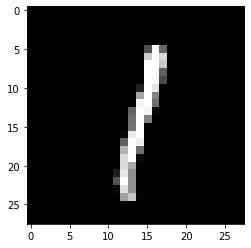

In [ ]:
sample = x_test[57]
print(sample.shape)
# https://stackoverflow.com/a/43019294/3833166
x = np.expand_dims(sample, axis=0)
print(np.argmax(loaded_model.predict(x)))

plt.imshow(sample.reshape((28, 28)), cmap='gray')
plt.show()

The following code is used, from the test set, to identify and save 2 samples of each class as PNG files. These PNG files will be used to demonstrate the model.

In [ ]:
from collections import defaultdict

def is_done(dictionary):
  if len(dictionary) < 10:
    return False

  for items in dictionary.values():
    if len(items) < 2:
      return False

  return True

# find and save 2 of each sample as png images
indexes_by_class_label = defaultdict(list)
found = set()
for index, one_hot_label in enumerate(y_test):
  class_label = np.argmax(one_hot_label)

  if len(indexes_by_class_label[class_label]) < 2:
    indexes_by_class_label[class_label].append(index)

  if is_done(indexes_by_class_label):
    break

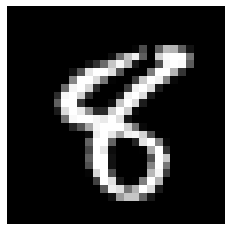

In [ ]:
def save_image(class_label, sample, sample_index):
  fig.patch.set_visible(False)
  plt.gca().axison = False
  plt.imshow(sample.reshape((28, 28)), cmap='gray')
  plt.savefig(f'samples/{class_label}_sample_{sample_index}', bbox_inches='tight', pad_inches=0)
    

for class_label, indexes in indexes_by_class_label.items():
  for sample_index, index_in_test_set in enumerate(indexes):
    save_image(class_label, x_test[index_in_test_set], sample_index)